### Import Libraries

In [1]:
import numpy as np
import pickle

from sklearn import linear_model
from sklearn import metrics
from sklearn import svm
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
### Check version
import sys
import sklearn
print(sys.version)
!python --version
print("numpy: ", np.__version__)
print("sklearn: ", sklearn.__version__)

3.10.9 (main, Jan 11 2023, 09:18:18) [Clang 14.0.6 ]
Python 3.10.9
numpy:  1.24.2
sklearn:  1.0.2


In [3]:
# code for loading the data

with open("task1_multiomics_data.pickle", "rb") as file:
    data_multiomics = pickle.load(file)
    
data_multiomics.head(5)

Training/Validation Gates ID       MRN Study Subject ID Number     Sex  \
                                                                           
0                   T  PTLG002  16661779                   10565    Male   
1                   T  PTLG002  16661779                   10565    Male   
2                   T  PTLG002  16661779                   10565    Male   
3                   T  PTLG002  16661779                   10565    Male   
4                   T  PTLG004  23587868                   10603  Female   

  sex_bin timepoint gestational_age cellfree_rna                ...  \
                                       0_C2orf76      1_ACTL10  ...   
0       1         1              11     0.312437 -1.892930e-16  ...   
1       1         2              18     0.312437 -1.892930e-16  ...   
2       1         3              32     0.312437 -1.892930e-16  ...   
3       1         4              45     0.312437 -1.892930e-16  ...   
4       0         1              11     5.204209  1.734736e+00  ...   

  plasma_somalogic                                                             \
       1290_UBE2G2 1291_TAGLN2 1292_ATP5O 1293_POMC 1294_CRYZL1 1295_SERPINF1   
0           4804.4      2233.0     3610.9     715.8       151.4       37885.8   
1           4086.0      2160.5     2260.4     825.2       161.0       41821.5   
2           4328.0      1818.4     2445.2    1241.8       194.6       45526.1   
3           3442.4      2661.4     3879.2     703.6       153.7       36862.5   
4           4261.9      1804.6     1470.6     526.8       163.0       38938.3   

                                              
  1296_CTSF 1297_FTCD 1298_USP25 1299_PLXNB2  
0    1479.1    3261.8      561.3      3227.0  
1    1465.1    1839.8      597.8      3366.0  
2    1428.3    3057.2      625.7      8703.7  
3    1063.6    7339.7      593.2      2918.9  
4    1170.1    1036.8      552.8      3457.1  

[5 rows x 61274 columns]

In [4]:
# look at the immune system
data_multiomics["immune_system"].head(5)

,0_Bcells,1_CD16+CD56-NKcells,2_CD4+Tcells_mem,3_CD4+Tcells_naive,4_CD4+Tcells,5_CD45RA+Tregs,6_CD45RA-Tregs,7_CD56+CD16-NKcells,8_CD7+NKcells,9_CD8+Tcells_mem,...,524_M-MDSC_STAT5_Unstim,525_mDCs_STAT5_Unstim,526_ncMCs_STAT5_Unstim,527_pDCs_STAT5_Unstim,528_Tbet+CD4+Tcells_mem_STAT5_Unstim,529_Tbet+CD4+Tcells_naive_STAT5_Unstim,530_Tbet+CD8+Tcells_mem_STAT5_Unstim,531_Tbet+CD8+Tcells_naive_STAT5_Unstim,532_TCRgd+Tcells_STAT5_Unstim,533_Tregs_STAT5_Unstim
0,0.053164,0.054978,0.297875,0.136289,0.445832,0.002570,0.013848,0.007052,0.070836,0.118884,...,0.998954,0.953637,1.082629,0.808610,0.504269,0.757424,0.462045,0.454665,0.443859,0.529431
1,0.052857,0.069794,0.279917,0.140350,0.430839,0.002470,0.010923,0.004759,0.080245,0.127831,...,0.930847,0.822618,0.931126,0.728738,0.613059,0.852393,0.506981,0.474408,0.491691,0.574133
2,0.053202,0.050829,0.277997,0.187659,0.479078,0.003473,0.013359,0.005302,0.063781,0.104513,...,1.077824,0.970954,1.011011,0.749277,0.752882,0.813249,0.560379,0.481862,0.505706,0.640245
3,0.049906,0.090496,0.266336,0.156263,0.432904,0.003071,0.014459,0.004318,0.101386,0.115243,...,0.976888,0.918164,1.028114,0.790166,0.505349,0.648406,0.464522,0.445444,0.438285,0.573058
4,0.103067,0.004128,0.162746,0.103950,0.270840,0.003198,0.007988,0.007153,0.090763,0.057064,...,0.890405,0.800468,1.067789,0.563615,0.464563,1.004497,0.378557,0.423530,0.332368,0.447904


In [5]:
# Define the input and output features
# Input feature
X = np.array(data_multiomics["immune_system"])
print("The input shape is: \n", X.shape)

# Output feature
y = np.array(data_multiomics["gestational_age"]) 
print("The output shape is: \n", y.shape)

The input shape is: 
 (68, 534)
The output shape is: 
 (68,)


In [6]:
# Split dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [7]:
# Run some statistical tests
# Check for correlation

# Feature Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Is it not advisable to first examine the distribution of the dataset before selecting a model?

In [8]:
# ElasticNet

eNet_multiomics = linear_model.ElasticNet(l1_ratio = 0.5, alpha = 0.1, random_state = 0)
eNet_multiomics.fit(X_train, y_train) # Model fitting using the training set
y_pred = eNet_multiomics.predict(X_test) # Model prediction using the test set

print("MSE: \n", metrics.mean_squared_error(y_test, y_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_pred.round(0))

MSE: 
 84.61759476679482
RMSE: 
 9.198782243688282
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [19. 38. 25. 22. 33. 19. 27. 18. 40. 30. 12. 21. 31. 28. 11. 21. 34.]


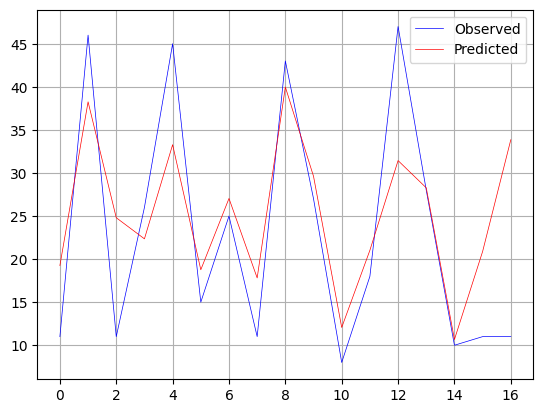

In [17]:
# Plot of the observed and predicted values of gestational age

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.5, color = 'blue', label = 'Observed')
plt.plot(x_ax, y_pred, lw = 0.5, color = 'red', label = 'Predicted')
plt.legend(loc='best')
plt.grid()

In [11]:
import warnings;warnings.simplefilter('ignore')

In [12]:
# ElasticNetCV

eNetcv_multiomics = linear_model.ElasticNetCV(l1_ratio = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], 
                                              alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0], 
                                              random_state = 0)
eNetcv_multiomics.fit(X_train, y_train) # Model fitting using the training set
y_predcv = eNetcv_multiomics.predict(X_test) # Model prediction using the test set

print("MSE: \n", metrics.mean_squared_error(y_test, y_predcv))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_predcv)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_predcv.round(0))

MSE: 
 113.95453175797762
RMSE: 
 10.674948794161853
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [23. 38. 26. 19. 28. 23. 23. 17. 36. 23.  7. 25. 38. 26. 18. 23. 37.]


In [13]:
# Printing the optimal alpha
print("The optimal alpha is: \n", eNetcv_multiomics.alpha_)

The optimal alpha is: 
 1.0


In [15]:
# Creating a new model with the optimal alpha
eNet_tuned_multiomics = linear_model.ElasticNet(l1_ratio = 0.5, alpha = eNetcv_multiomics.alpha_, random_state = 0)
eNet_tuned_multiomics.fit(X_train, y_train) # Model fitting using the training set
y_tuned_pred = eNet_tuned_multiomics.predict(X_test) # Model prediction using the test set

print("MSE: \n", metrics.mean_squared_error(y_test, y_tuned_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_tuned_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_tuned_pred.round(0))

MSE: 
 126.53544502911507
RMSE: 
 11.24879749258182
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [25. 35. 26. 19. 30. 23. 23. 17. 38. 24.  8. 25. 32. 25. 18. 25. 37.]


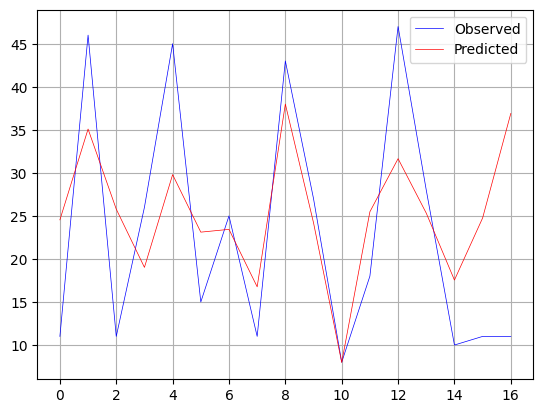

In [16]:
# Plot of the observed and predicted values of gestational age

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.5, color = 'blue', label = 'Observed')
plt.plot(x_ax, y_tuned_pred, lw = 0.5, color = 'red', label = 'Predicted')
plt.legend(loc='best')
plt.grid()

 From the figure above is looks like the ElasticNet Regression Model does not give good prediction of the target set, the question now is why?

# Support Vector Regression Model (Incorrect!)

In [13]:
# Support Vector Regression

#svm_multiomics = svm.LinearSVR()
#svm_multiomics = make_pipeline(StandardScaler(), 
#                              LinearSVR(random_state = 0, tol = 1e-5))
svm_multiomics = svm.SVC(kernel = 'linear', C = 1, random_state = 0) # why random_state = 42?
svm_multiomics.fit(X_train, y_train) # Model fitting using the training set
y_svm_pred = svm_multiomics.predict(X_test) # Model prediction using the test set
svm_score = svm_multiomics.score(X_test, y_test)

print("MSE: \n", metrics.mean_squared_error(y_test, y_svm_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_svm_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_svm_pred.round(0))
print("The SVM scores is given by: \n ", svm_score)

MSE: 
 312.52941176470586
RMSE: 
 17.678501400421528
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [27 24 16 18 11 28 16 15 17 15 11 28 19 16 17 11 45]
The SVM scores is given by: 
  0.058823529411764705


In [14]:
# The k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [137]:
# On the training dataset
#score_train = cross_val_score(svm_multiomics, X_train, y_train, scoring = 'r2', cv = 5)
#score_train

In [15]:
scores = cross_val_score(svm_multiomics, X, y, cv=5)
scores

/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.        , 0.07142857, 0.14285714, 0.        , 0.15384615])

In [16]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.07 accuracy with a standard deviation of 0.07


In [17]:
# Mean score
#print(np.mean(score_train))

In [18]:
# Printing the scores on the test dataset
# First: Prediction
pred = cross_val_predict(svm_multiomics, X_test, y_test)
print("MSE: \n", metrics.mean_squared_error(y_test, pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", pred.round(0))

MSE: 
 561.4117647058823
RMSE: 
 23.694129329981347
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [10 47 47 11 11 11 45 27 10 11 25 45 11 11 43 45 11]


/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


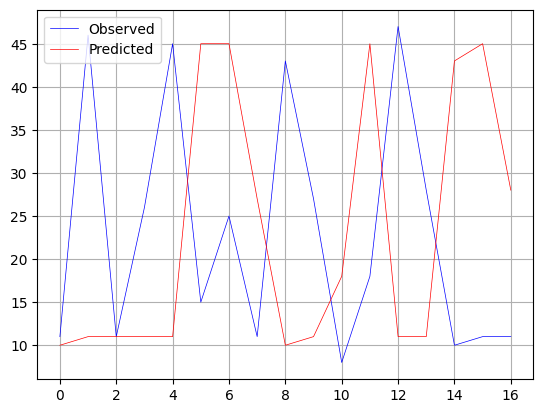

In [140]:
# Plot of the observed and predicted values of gestational age

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.5, color = 'blue', label = 'Observed')
plt.plot(x_ax, pred, lw = 0.5, color = 'red', label = 'Predicted')
plt.legend(loc='best')
plt.grid()

Figure. 2 above looks better but it is still not an appropriate approximation.

# Lasso Regression

In [19]:
lr_multiomics = linear_model.Lasso(alpha = 0.1, normalize = True)
lr_multiomics.fit(X_train, y_train)

print("Total coefficients: \n", len(lr_multiomics.coef_))
print("Non-zero coefficients: \n", np.count_nonzero(lr_multiomics.coef_))

Total coefficients: 
 534
Non-zero coefficients: 
 26


/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [20]:
y_lr_pred = lr_multiomics.predict(X_test)

print("MSE: \n", metrics.mean_squared_error(y_test, y_lr_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_lr_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_lr_pred.round(0))

MSE: 
 96.91018833484452
RMSE: 
 9.844297249415243
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [21. 38. 25. 21. 28. 21. 25. 17. 38. 24.  7. 26. 39. 26. 17. 22. 35.]


### CV

In [21]:
lr_cv_multiomics = linear_model.LassoCV(alphas = [0.5, 0.6, 0.7, 0.8, 0.9], normalize = True)
lr_cv_multiomics.fit(X_train, y_train)
y_lr_cv_pred = lr_cv_multiomics.predict(X_test)

print("MSE: \n", metrics.mean_squared_error(y_test, y_lr_cv_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_lr_cv_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_lr_cv_pred.round(0))

MSE: 
 154.5389175183426
RMSE: 
 12.431368288259446
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [27. 31. 28. 23. 24. 26. 22. 23. 28. 24. 16. 22. 37. 24. 21. 20. 34.]


/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [22]:
# Printing the optimal alpha
print("The optimal alpha is: \n", lr_cv_multiomics.alpha_)

The optimal alpha is: 
 0.5


In [23]:
# Creating a new model with the optimal alpha
lr_tuned_multiomics = linear_model.Lasso(alpha = 0.5, normalize = True)
lr_tuned_multiomics.fit(X_train, y_train) # Model fitting using the training set
y_lr_tuned_pred = lr_tuned_multiomics.predict(X_test) # Model prediction using the test set

print("MSE: \n", metrics.mean_squared_error(y_test, y_lr_tuned_pred))
print("RMSE: \n", np.sqrt(metrics.mean_squared_error(y_test, y_lr_tuned_pred)))
print("The target set is given by: \n", y_test)
print("The prediction is given by: \n", y_lr_tuned_pred.round(0))

MSE: 
 154.5389175183426
RMSE: 
 12.431368288259446
The target set is given by: 
 [11 46 11 26 45 15 25 11 43 27  8 18 47 28 10 11 11]
The prediction is given by: 
 [27. 31. 28. 23. 24. 26. 22. 23. 28. 24. 16. 22. 37. 24. 21. 20. 34.]


/Users/maviano/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


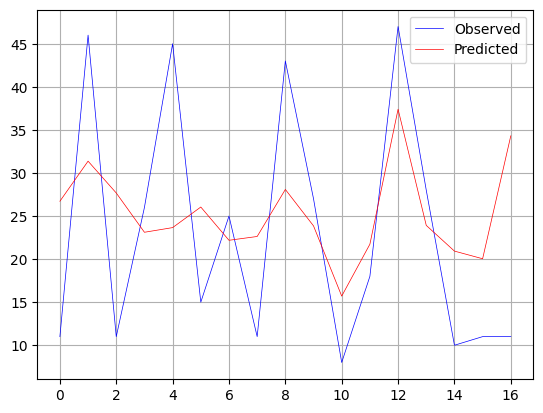

In [24]:
# Plot of the observed and predicted values of gestational age

x_ax = range(len(X_test))
plt.plot(x_ax, y_test, lw = 0.5, color = 'blue', label = 'Observed')
plt.plot(x_ax, y_lr_tuned_pred, lw = 0.5, color = 'red', label = 'Predicted')
plt.legend(loc='best')
plt.grid()

## Remark
To evaluate the models, you can consider using a suitable measure such as mean absolute error (MAE) or root mean squared error (RMSE). These metrics provide insights into the average difference or deviation between the predicted gestational age and the actual gestational age.